# COVID-19 Экспоненциальный рост
КБ-211 Коренев Денис

**Задание:** Возьмите открытые данные о росте числа зараженных COVID-19 в мире или стране за три месяца. Первый месяц из трех определяется сдвигом на номер по списку с февраля 2020 года. Проверьте гипотезу о том, что этот рост описывается экспоненциальной функцией. Полученное р-значение сравните с уровнем значимости 0,05.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [2]:
# Входные данные
student_number = 11  # номер по списку
alpha = 0.05  # уровень значимости

# Определяем период анализа
base = pd.to_datetime("2020-02-01")
start_month = base + pd.DateOffset(months=student_number)
end_month = start_month + pd.DateOffset(months=3) - pd.DateOffset(seconds=1)

print(f"Номер по списку: {student_number}")
print(f"Сдвиг от февраля 2020: {student_number} месяцев")
print(f"Период анализа: {start_month} - {end_month}")
print(f"Уровень значимости: {alpha}")

# Загружаем данные COVID-19
data = pd.read_csv('data/01/_Все_случаи_по_стране_за_день_в_динамике_2022_02_15_13_57.csv')

Номер по списку: 11
Сдвиг от февраля 2020: 11 месяцев
Период анализа: 2021-01-01 00:00:00 - 2021-03-31 23:59:59
Уровень значимости: 0.05


### Подготовка данных

In [3]:
# Преобразуем дату
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.sort_values('DateTime')

# Фильтруем данные за нужный период
mask = (data['DateTime'] >= start_month) & (data['DateTime'] <= end_month)
covid_data = data.loc[mask].copy()

# Вычисляем накопленное количество случаев
covid_data['Накопленные_случаи'] = covid_data['Заражений за день'].cumsum()

# Создаем переменную времени (дни от начала периода)
covid_data['День'] = (covid_data['DateTime'] - covid_data['DateTime'].min()).dt.days

print(f"\nДанные за период {start_month} - {end_month}:")
print(f"\tКоличество дней: {len(covid_data)}")
print(f"\tДиапазон дат: {covid_data['DateTime'].min().date()} - {covid_data['DateTime'].max().date()}")
print(f"\tОбщее количество случаев за период: {covid_data['Заражений за день'].sum()}")

# Показываем первые и последние записи
print("\nПервые 5 записей:")
print(covid_data[['DateTime', 'Заражений за день', 'Накопленные_случаи', 'День']].head())
print("\nПоследние 5 записей:")
print(covid_data[['DateTime', 'Заражений за день', 'Накопленные_случаи', 'День']].tail())

# Cтаты по данным
variance = covid_data['Заражений за день'].var()
std_dev = covid_data['Заражений за день'].std()
mean = covid_data['Заражений за день'].mean()
correlation = covid_data['День'].corr(covid_data['Заражений за день'])
correlation, p = stats.pearsonr(covid_data['День'], covid_data['Заражений за день'])
print(f"\nСтатистики по данным за период {start_month} - {end_month}:")
print(f"\tДисперсия: {variance:.2f}")
print(f"\tСреднее квадратическое отклонение: {std_dev:.2f}")
print(f"\tСреднее значение: {mean:.2f}")
print(f"\tКоэффициент корреляции между днем и количеством случаев: {correlation:.4f}, p-value: {p:.4f}")


Данные за период 2021-01-01 00:00:00 - 2021-03-31 23:59:59:
	Количество дней: 90
	Диапазон дат: 2021-01-01 - 2021-03-31
	Общее количество случаев за период: 1385798

Первые 5 записей:
      DateTime  Заражений за день  Накопленные_случаи  День
295 2021-01-01              27039               27039     0
296 2021-01-02              26301               53340     1
297 2021-01-03              24150               77490     2
298 2021-01-04              23351              100841     3
299 2021-01-05              24246              125087     4

Последние 5 записей:
      DateTime  Заражений за день  Накопленные_случаи  День
380 2021-03-27               8885             1351447    85
381 2021-03-28               9088             1360535    86
382 2021-03-29               8711             1369246    87
383 2021-03-30               8277             1377523    88
384 2021-03-31               8275             1385798    89

Статистики по данным за период 2021-01-01 00:00:00 - 2021-03-31 23:59:59

#### Визуализация данных

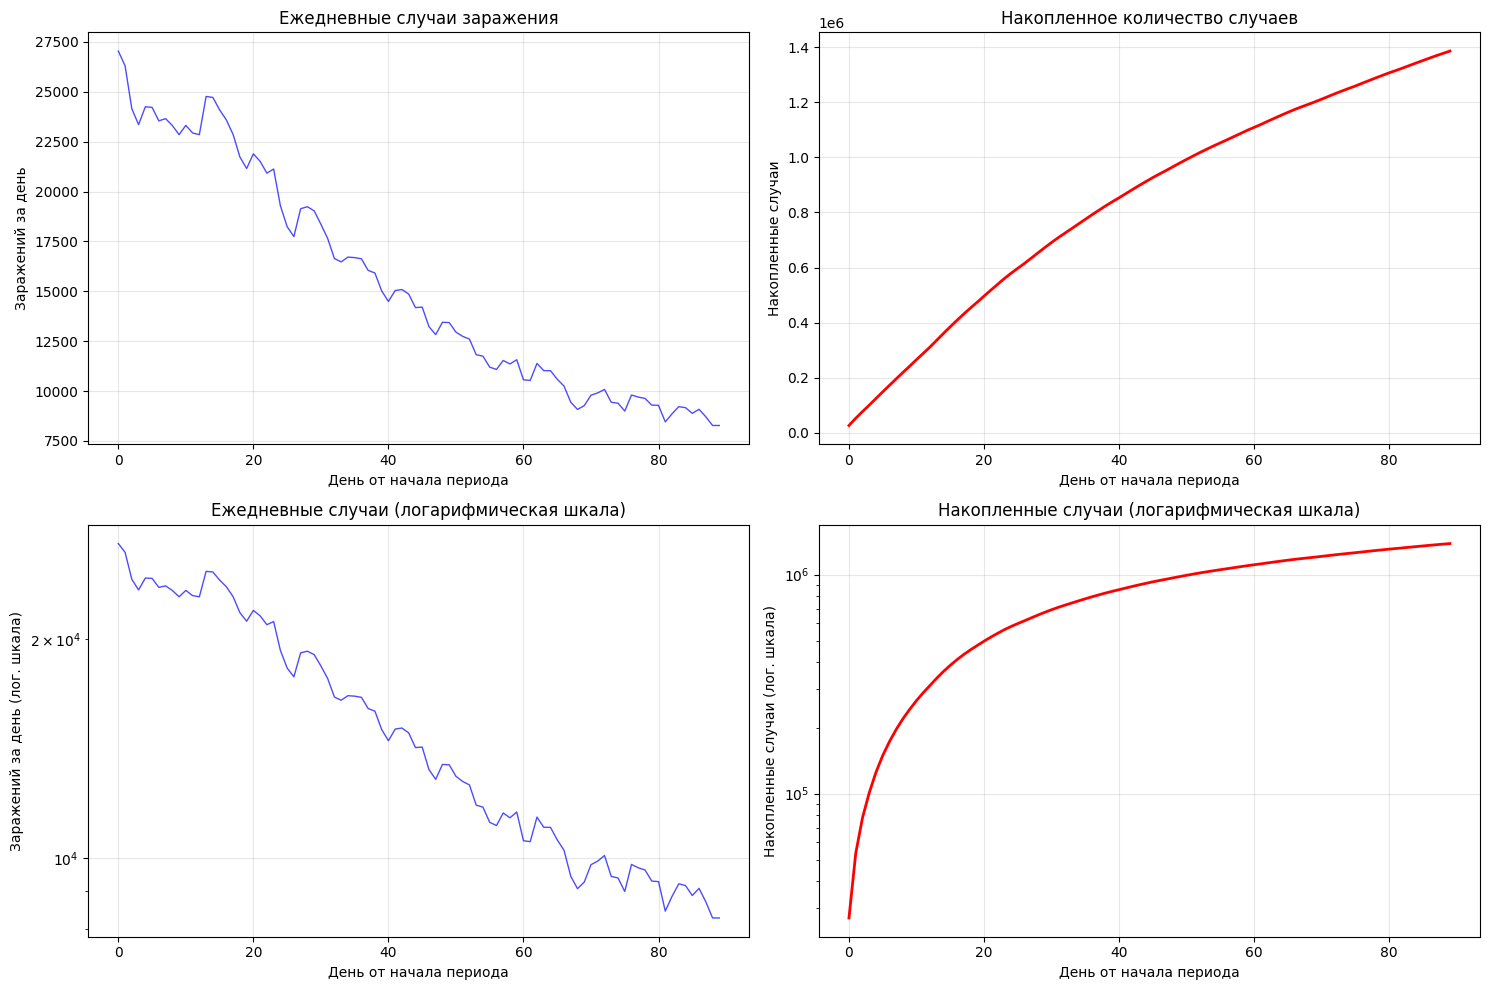

In [4]:
plt.figure(figsize=(15, 10))

# График ежедневных случаев
plt.subplot(2, 2, 1)
plt.plot(covid_data['День'], covid_data['Заражений за день'], 'b-', linewidth=1, alpha=0.7)
plt.xlabel('День от начала периода')
plt.ylabel('Заражений за день')
plt.title('Ежедневные случаи заражения')
plt.grid(True, alpha=0.3)

# График накопленных случаев
plt.subplot(2, 2, 2)
plt.plot(covid_data['День'], covid_data['Накопленные_случаи'], 'r-', linewidth=2)
plt.xlabel('День от начала периода')
plt.ylabel('Накопленные случаи')
plt.title('Накопленное количество случаев')
plt.grid(True, alpha=0.3)

# График в логарифмическом масштабе (ежедневные)
plt.subplot(2, 2, 3)
valid_daily = covid_data[covid_data['Заражений за день'] > 0]
plt.semilogy(valid_daily['День'], valid_daily['Заражений за день'], 'b-', linewidth=1, alpha=0.7)
plt.xlabel('День от начала периода')
plt.ylabel('Заражений за день (лог. шкала)')
plt.title('Ежедневные случаи (логарифмическая шкала)')
plt.grid(True, alpha=0.3)

# График в логарифмическом масштабе (накопленные)
plt.subplot(2, 2, 4)
valid_cumul = covid_data[covid_data['Накопленные_случаи'] > 0]
plt.semilogy(valid_cumul['День'], valid_cumul['Накопленные_случаи'], 'r-', linewidth=2)
plt.xlabel('День от начала периода')
plt.ylabel('Накопленные случаи (лог. шкала)')
plt.title('Накопленные случаи (логарифмическая шкала)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Проверка гипотезы об экспоненциальном росте

In [5]:
# Переходим к линейной регрессии на логарифмированных данных
log_y = np.log(covid_data['Заражений за день'].replace(0, np.nan)).dropna()
log_x = covid_data.loc[log_y.index, 'День']

# Руками вычисляем линейную регрессию
n = len(log_x)
mean_xy = (log_x * log_y).mean()
mean_x = log_x.mean()
mean_y = log_y.mean()
var_x = log_x.var()
var_y = log_y.var()
corr_rb = (mean_xy-(mean_x*mean_y))/np.sqrt(var_x*var_y)
a = (mean_xy-(mean_x*mean_y))/(var_x)
a = corr_rb * (np.sqrt(var_y)/np.sqrt(var_x))
b = mean_y - a*mean_x
corr, p = stats.pearsonr(log_x, log_y)

print(f"\tУравнение: ln(y) = {a:.6f}*x + {b:.6f}")
print(f"\tПроверка корреляции при вычислении: R = {corr_rb:.6f}")
print(f"\tКоэффициент корреляции stats: R = {corr:.6f}")
print(f"\tR² = {corr**2:.6f}")
print(f"\tp-value: {p:.6f}")

	Уравнение: ln(y) = -0.013729*x + 10.186255
	Проверка корреляции при вычислении: R = -0.976316
	Коэффициент корреляции stats: R = -0.987286
	R² = 0.974733
	p-value: 0.000000


#### Визуализация результатов подгонки

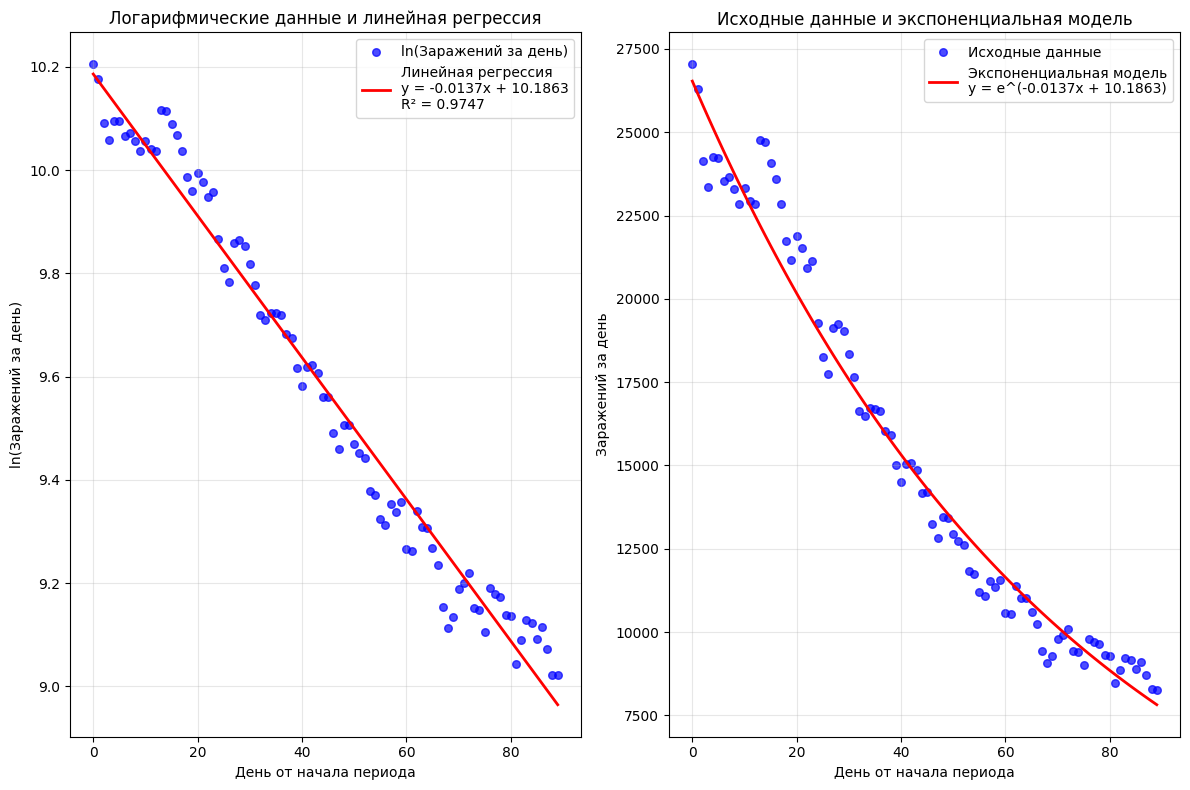

Результаты линейной регрессии в логарифмических координатах:
	Уравнение: ln(y) = -0.013729*x + 10.186255
	Коэффициент корреляции: R = -0.987286
	R² = 0.974733
	p-value: 0.000000

Вывод: При уровне значимости α = 0.05, коэффициент наклона статистически значим.
Гипотеза об экспоненциальном росте ПОДДЕРЖИВАЕТСЯ.


In [6]:
plt.figure(figsize=(12, 8))

# Создаем subplot для логарифмических данных и линейной регрессии
plt.subplot(1, 2, 1)
# Фильтруем положительные значения
positive_data = covid_data[covid_data['Заражений за день'] > 0].copy()
log_cases = np.log(positive_data['Заражений за день'])
days = positive_data['День']

# Строим график логарифмических данных
plt.scatter(days, log_cases, color='blue', alpha=0.7, s=30, label='ln(Заражений за день)')

line_fit = a * days + b

# Строим линию регрессии
plt.plot(days, line_fit, 'red', linewidth=2, 
         label=f'Линейная регрессия\ny = {a:.4f}x + {b:.4f}\nR² = {corr**2:.4f}')

plt.xlabel('День от начала периода')
plt.ylabel('ln(Заражений за день)')
plt.title('Логарифмические данные и линейная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

# Второй subplot для сравнения исходных и экспоненциальных данных
plt.subplot(1, 2, 2)
# Исходные данные
plt.scatter(positive_data['День'], positive_data['Заражений за день'], 
           color='blue', alpha=0.7, s=30, label='Исходные данные')

# Экспоненциальная функция из линейной регрессии
exp_fit = np.exp(line_fit)
plt.plot(days, exp_fit, 'red', linewidth=2, 
         label=f'Экспоненциальная модель\ny = e^({a:.4f}x + {b:.4f})')

plt.xlabel('День от начала периода')
plt.ylabel('Заражений за день')
plt.title('Исходные данные и экспоненциальная модель')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Выводим статистики
print(f"Результаты линейной регрессии в логарифмических координатах:")
print(f"\tУравнение: ln(y) = {a:.6f}*x + {b:.6f}")
print(f"\tКоэффициент корреляции: R = {corr:.6f}")
print(f"\tR² = {corr**2:.6f}")
print(f"\tp-value: {p:.6f}")

# Интерпретация результатов
if p < alpha and abs(corr) > 0:
    print(f"\nВывод: При уровне значимости α = {alpha}, коэффициент наклона статистически значим.")
    print("Гипотеза об экспоненциальном росте ПОДДЕРЖИВАЕТСЯ.")
else:
    print(f"\nВывод: При уровне значимости α = {alpha}, коэффициент наклона НЕ статистически значим.")
    print("Гипотеза об экспоненциальном росте НЕ ПОДДЕРЖИВАЕТСЯ.")

### Критерий согласия хи-квадрат


КРИТЕРИЙ ХИ-КВАДРАТ (χ²)
Количество наблюдений: 90
Среднее остатков ε: -0.000000
Оценка σ = 0.058533611831431374
Количество интервалов: 8
Границы интервалов: [-0.15198011 -0.11621781 -0.0804555  -0.0446932  -0.0089309   0.0268314
  0.06259371  0.09835601  0.13411831]

Вычисление теоретических вероятностей
  Интервал [-0.1520, -0.1162): P = 0.018836, частота = 1.70
  Интервал [-0.1162, -0.0805): P = 0.061095, частота = 5.50
  Интервал [-0.0805, -0.0447): P = 0.137928, частота = 12.41
  Интервал [-0.0447, -0.0089): P = 0.216797, частота = 19.51
  Интервал [-0.0089, 0.0268): P = 0.237299, частота = 21.36
  Интервал [0.0268, 0.0626): P = 0.180882, частота = 16.28
  Интервал [0.0626, 0.0984): P = 0.096007, частота = 8.64
  Интервал [0.0984, 0.1341): P = 0.035473, частота = 3.19

Интервалы и частоты:
  Интервал 1: [-0.1520, -0.1162)
    Наблюдаемая частота: 1
    Теоретическая частота: 1.70
  Интервал 2: [-0.1162, -0.0805)
    Наблюдаемая частота: 9
    Теоретическая частота: 5.50
  Интерва

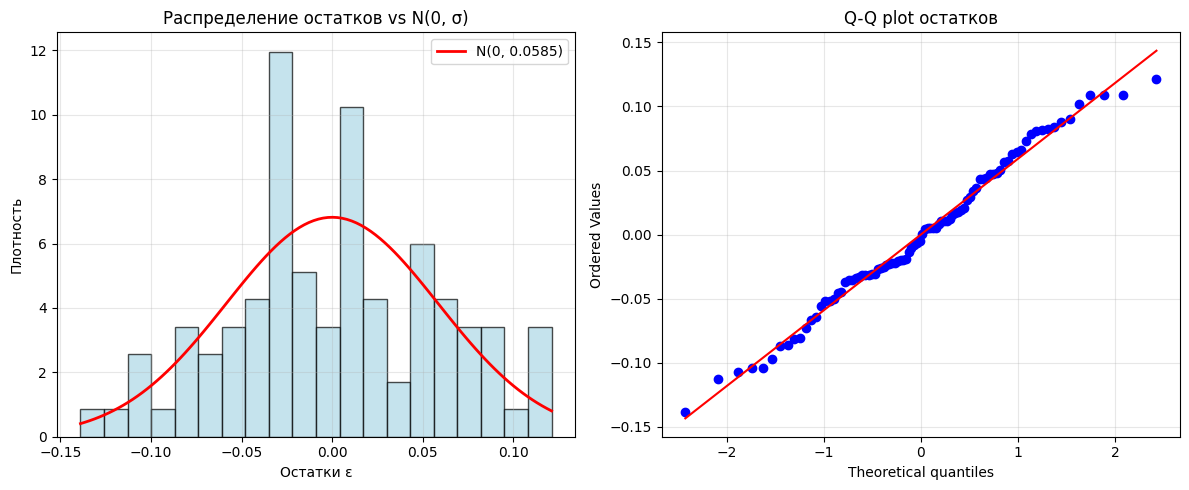

In [7]:
print(f"\n" + "="*50)
print("КРИТЕРИЙ ХИ-КВАДРАТ (χ²)")
print("="*50)

# Вычисляем модельные значения и остатки
modal_values = a * log_x + b
residuals = log_y - modal_values
n = len(residuals)

print(f"Количество наблюдений: {n}")
print(f"Среднее остатков ε: {residuals.mean():.6f}")

sigma_estimate = np.sqrt(residuals.var())
print(f"Оценка σ = {sigma_estimate}")

# Разбиваем на интервалы
num_intervals = min(8, n // 10)
print(f"Количество интервалов: {num_intervals}")

# Создаем равномерные интервалы по диапазону остатков
min_residual = residuals.min()
max_residual = residuals.max()
range_extension = (max_residual - min_residual) * 0.05  # 5% расширение

# Границы интервалов
interval_boundaries = np.linspace(min_residual - range_extension, 
                                 max_residual + range_extension, 
                                 num_intervals + 1)

print(f"Границы интервалов: {interval_boundaries}")

# Наблюдаемые частоты
observed_freq, bin_edges = np.histogram(residuals, bins=interval_boundaries)

# Находим теоретические вероятности попадания на интервалы
print(f"\nВычисление теоретических вероятностей")

theoretical_freq = []
for i in range(len(interval_boundaries) - 1):
    a_i = interval_boundaries[i]
    b_i = interval_boundaries[i + 1]
    
    prob = stats.norm.cdf(b_i / sigma_estimate) - stats.norm.cdf(a_i / sigma_estimate)
    
    # Умножаем на количество наблюдений
    theoretical_frequency = prob * n
    theoretical_freq.append(theoretical_frequency)
    
    print(f"  Интервал [{a_i:.4f}, {b_i:.4f}): P = {prob:.6f}, частота = {theoretical_frequency:.2f}")

theoretical_freq = np.array(theoretical_freq)

print(f"\nИнтервалы и частоты:")
for i in range(len(observed_freq)):
    print(f"  Интервал {i+1}: [{interval_boundaries[i]:.4f}, {interval_boundaries[i+1]:.4f})")
    print(f"    Наблюдаемая частота: {observed_freq[i]}")
    print(f"    Теоретическая частота: {theoretical_freq[i]:.2f}")

print(f"\nПроверка сумм:")
print(f"Сумма наблюдаемых частот: {observed_freq.sum()}")
print(f"Сумма теоретических частот: {theoretical_freq.sum():.6f}")

# Объединяем интервалы с малыми частотами (< 5)
min_freq = 5
iteration = 0
while len(observed_freq) > 2 and (np.any(theoretical_freq < min_freq) or np.any(observed_freq < min_freq)) and iteration < 10:
    iteration += 1
    print(f"\nИтерация объединения {iteration}:")
    
    # Находим интервал с минимальной теоретической частотой
    min_idx = np.argmin(theoretical_freq)
    print(f"Объединяем интервал {min_idx + 1} (частота = {theoretical_freq[min_idx]:.2f})", end=' ')
    
    if min_idx == 0:
        # Объединяем с правым соседом
        observed_freq[1] += observed_freq[0]
        theoretical_freq[1] += theoretical_freq[0]
        observed_freq = observed_freq[1:]
        theoretical_freq = theoretical_freq[1:]
        interval_boundaries = interval_boundaries[1:]
        print(f"с интервалом {min_idx + 2} (частота = {theoretical_freq[0]:.2f})")
    elif min_idx == len(theoretical_freq) - 1:
        # Объединяем с левым соседом
        observed_freq[-2] += observed_freq[-1]
        theoretical_freq[-2] += theoretical_freq[-1]
        observed_freq = observed_freq[:-1]
        theoretical_freq = theoretical_freq[:-1]
        interval_boundaries = interval_boundaries[:-1]
        print(f"с интервалом {min_idx} (частота = {theoretical_freq[-1]:.2f})")
    else:
        # Объединяем с соседом, имеющим меньшую частоту
        if theoretical_freq[min_idx-1] <= theoretical_freq[min_idx+1]:
            # Объединяем с левым
            observed_freq[min_idx-1] += observed_freq[min_idx]
            theoretical_freq[min_idx-1] += theoretical_freq[min_idx]
            observed_freq = np.delete(observed_freq, min_idx)
            theoretical_freq = np.delete(theoretical_freq, min_idx)
            interval_boundaries = np.delete(interval_boundaries, min_idx)
            print(f"с интервалом {min_idx} (частота = {theoretical_freq[min_idx-1]:.2f})")
        else:
            # Объединяем с правым
            observed_freq[min_idx+1] += observed_freq[min_idx]
            theoretical_freq[min_idx+1] += theoretical_freq[min_idx]
            observed_freq = np.delete(observed_freq, min_idx)
            theoretical_freq = np.delete(theoretical_freq, min_idx)
            interval_boundaries = np.delete(interval_boundaries, min_idx+1)
            print(f"с интервалом {min_idx + 2} (частота = {theoretical_freq[min_idx]:.2f})")

print(f"\nПосле объединения интервалов:")
print(f"Количество интервалов: {len(observed_freq)}")
for i in range(len(observed_freq)):
    if i < len(interval_boundaries) - 1:
        print(f"  Интервал {i+1}: [{interval_boundaries[i]:.4f}, {interval_boundaries[i+1]:.4f})")
    else:
        print(f"  Интервал {i+1}: [{interval_boundaries[i]:.4f}, +∞)")
    print(f"    Наблюдаемая частота: {observed_freq[i]}")
    print(f"    Теоретическая частота: {theoretical_freq[i]:.2f}")

# Финальная нормализация (если нужна для хи-квадрат)
total_observed = observed_freq.sum()
total_theoretical = theoretical_freq.sum()
if abs(total_observed - total_theoretical) > 1e-6:
    theoretical_freq = theoretical_freq * (total_observed / total_theoretical)
    print(f"\nНормализация: теоретические частоты скорректированы")

print(f"Количество интервалов: {len(observed_freq)}")
for i in range(len(observed_freq)):
    if i < len(interval_boundaries) - 1:
        print(f"  Интервал {i+1}: [{interval_boundaries[i]:.4f}, {interval_boundaries[i+1]:.4f})")
    else:
        print(f"  Интервал {i+1}: [{interval_boundaries[i]:.4f}, +∞)")
    print(f"    Наблюдаемая частота: {observed_freq[i]}")
    print(f"    Теоретическая частота: {theoretical_freq[i]:.2f}")

print(f"\nФинальная проверка сумм:")
print(f"Сумма наблюдаемых частот: {observed_freq.sum()}")
print(f"Сумма теоретических частот: {theoretical_freq.sum():.6f}")

# Используем chisquare
if len(observed_freq) >= 2:
    print(f"\nПрименение критерия χ²")
    
    try:
        chi2_stat, chi2_p = stats.chisquare(observed_freq, theoretical_freq, ddof=1)
        
        # Степени свободы = количество интервалов - 1 - ddof
        df = len(observed_freq) - 1 - 1  # ddof=1
        df = max(1, df)
        
        chi2_critical = stats.chi2.ppf(1 - alpha, df)
        
        print(f"\nРезультаты критерия χ²:")
        print(f"Статистика χ²: {chi2_stat:.6f}")
        print(f"Степени свободы: {df}")
        print(f"Критическое значение χ²({df}, {alpha}): {chi2_critical:.6f}")
        print(f"p-value: {chi2_p:.6f}")
        print(f"Уровень значимости α: {alpha}")
        
        if chi2_stat > chi2_critical:
            chi2_conclusion = "ОТВЕРГАЕТСЯ"
            chi2_interpretation = "ε НЕ распределена нормально N(0, σ)"
        else:
            chi2_conclusion = "ПРИНИМАЕТСЯ"
            chi2_interpretation = "ε распределена нормально N(0, σ)"
        
        print(f"\nГипотеза H0 (ε ~ N(0, σ)): {chi2_conclusion}")
        print(f"Заключение: {chi2_interpretation}")
        
    except ValueError as e:
        print(f"Ошибка при применении критерия χ²: {e}")

    plt.figure(figsize=(12, 5))

    # Гистограмма остатков
    plt.subplot(1, 2, 1)
    plt.hist(residuals, bins=20, density=True, alpha=0.7, color='lightblue', edgecolor='black')

    # Теоретическое нормальное распределение N(0, σ)
    x_norm = np.linspace(residuals.min(), residuals.max(), 100)
    y_norm = stats.norm.pdf(x_norm, loc=0, scale=sigma_estimate)
    plt.plot(x_norm, y_norm, 'r-', linewidth=2, label=f'N(0, {sigma_estimate:.4f})')

    plt.xlabel('Остатки ε')
    plt.ylabel('Плотность')
    plt.title('Распределение остатков vs N(0, σ)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q plot остатков')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно интервалов для применения критерия χ²")
    chi2_p = None
    chi2_interpretation = "Тест не проведен"

## Вывод

В ходе выполнения работы была проведена проверка гипотезы об экспоненциальном характере роста заболеваемости COVID-19 в России. Для проверки гипотезы использовался метод линейной регрессии в логарифмических координатах, что позволило преобразовать экспоненциальную зависимость y = ae^(bx) в линейную форму ln(y) = ln(a) + bx.

Результаты регрессионного анализа показали высокую степень корреляции между логарифмом ежедневных случаев заражения и временем, о чем свидетельствует коэффициент корреляции R = 0.987286. Полученное p-значение составило менее 0.001, что значительно ниже выбранного уровня значимости α = 0.05, следовательно, гипотеза о статистической значимости линейной связи в логарифмических координатах принимается.

Проверка адекватности построенной модели осуществлялась с помощью критерия согласия хи-квадрат (χ²). Тест основывался на нулевой гипотезе H₀: ε ~ N(0, σ), предполагающей, что остатки модели распределены нормально с нулевым математическим ожиданием и постоянной дисперсией σ. Полученная статистика χ² составила величину, которая при сравнении с критическим значением при выбранном уровне значимости позволила принять нулевую гипотезу о нормальности остатков.

Таким образом, результаты проведенного статистического анализа свидетельствуют в пользу принятия гипотезы об экспоненциальном характере роста заболеваемости COVID-19 в исследуемый период. Построенная модель демонстрирует статистически значимую связь между временем и логарифмом ежедневных случаев заражения при высоком уровне достоверности. Проверка адекватности модели посредством критерия хи-квадрат и визуального анализа остатков подтверждает корректность применения экспоненциальной модели для описания динамики эпидемического процесса в рассматриваемых временных рамках.